# COMP5318 - Machine Learning and Data Mining: Assignment 2
<div style="text-align: right"> Group 86 </div>
<div style="text-align: right">Jiawei Sun (unikey1), Jenny Lin (470322974) </div>

## Hardware & software

In [2]:
#SOFTWARE SPEC(TODO - add new libraries)
import os, platform
print('OS name:', os.name, ', system:', platform.system(), ', release:', platform.release())
import sys
print("Anaconda version:")
#!conda list anaconda
print("Python version: ", sys.version)
print("Python version info: ", sys.version_info)
import PIL
from PIL import Image
print("PIL version: ", PIL.__version__)
import matplotlib
import matplotlib.pyplot as plt
print("Matplotlib version: ", matplotlib.__version__)
import tensorflow as tf
print("Keras version:", tf.keras.__version__)
import cv2
print("OpenCV version: ", cv2.__version__)
import numpy as np
print("nump version: ", np.__version__)


OS name: nt , system: Windows , release: 10
Anaconda version:
Python version:  3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
Python version info:  sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0)
PIL version:  8.0.1
Matplotlib version:  3.3.2
Keras version: 2.4.0
OpenCV version:  4.4.0
nump version:  1.18.5


In [2]:
#HARDWARE SPEC: 
import psutil
import platform
from datetime import datetime

uname = platform.uname()
print(f'System: {uname.system}')
print(f'Node Name: {uname.node}')
print(f'Release: {uname.release}')
print(f'Version: {uname.version}')
print(f'Machine: {uname.machine}')
print(f'Processor: {uname.processor}')
print('')
print('Physical cores & total Cores:', psutil.cpu_count(logical=False),psutil.cpu_count(logical=True))
cpufreqs = psutil.cpu_freq()
print(f'Total CPU Usage: {psutil.cpu_percent()}%')
print(f'Current Freq.: {cpufreqs.current:.2f}Mhz')
print(f'Min & Max & Freq.: {cpufreqs.min:.2f}Mhz, {cpufreqs.max:.2f}Mhz')


System: Windows
Node Name: USER-KKI3EJE0OC
Release: 10
Version: 10.0.17763
Machine: AMD64
Processor: Intel64 Family 6 Model 158 Stepping 10, GenuineIntel

Physical cores & total Cores: 6 12
Total CPU Usage: 0.0%
Current Freq.: 3696.00Mhz
Min & Max & Freq.: 0.00Mhz, 3696.00Mhz


## labels pre-processing

In [3]:
#DIRECTORY
print(os.listdir('../dataset'))

['test', 'train']


In [4]:
#GET FILE NAMES 
import glob

train = glob.glob('../dataset/train/*.jpeg')
test = glob.glob('../dataset/test/*.jpeg')


FEN_train = [os.path.basename(x)[:-5] for x in glob.glob('../dataset/train/*.jpeg')]
FEN_test = [os.path.basename(x)[:-5] for x in glob.glob('../dataset/test/*.jpeg')]

print(len(FEN_train))
print(FEN_train[:5])

80000
['1b1B1b2-2pK2q1-4p1rB-7k-8-8-3B4-3rb3', '1b1b1b2-3r4-1rK4b-R7-R2R1k2-2Bp4-2P5-2r5', '1B1B1K2-3p1N2-6k1-R7-5P2-4q3-7R-1B6', '1b1B1K2-R2B4-7P-3b4-3R2B1-8-3R4-4Qk2', '1b1b1n2-1K1RN1b1-3pbN2-8-4q1k1-4P3-8-2n3N1']


In [5]:
#FEN TO LABELS OF SQUARES

def FENtoL(FEN): 
    import re
    import string
    from collections import OrderedDict 
    rules = {
        r"-": r"",
        r"1": r"0",
        r"2": r"00",
        r"3": r"000",
        r"4": r"0000",
        r"5": r"00000",
        r"6": r"000000",
        r"7": r"0000000",
        r"8": r"00000000",
    }
    if type(FEN) == str:
        FEN = [FEN]
    label=[]
    for s in FEN:
        for key in rules.keys():
            s = re.sub(key, rules[key], s)
        label.append(s)
    return label

In [6]:
l_train = FENtoL(FEN_train)
l_test = FENtoL(FEN_test)

In [7]:
l_train[0:5]

['0b0B0b0000pK00q00000p0rB0000000k0000000000000000000B0000000rb000',
 '0b0b0b00000r00000rK0000bR0000000R00R0k0000Bp000000P0000000r00000',
 '0B0B0K00000p0N00000000k0R000000000000P000000q0000000000R0B000000',
 '0b0B0K00R00B00000000000P000b0000000R00B000000000000R00000000Qk00',
 '0b0b0n000K0RN0b0000pbN00000000000000q0k00000P0000000000000n000N0']

In [8]:
mat = np.array(list(l_train[1])).reshape((8,8))
mat

array([['0', 'b', '0', 'b', '0', 'b', '0', '0'],
       ['0', '0', '0', 'r', '0', '0', '0', '0'],
       ['0', 'r', 'K', '0', '0', '0', '0', 'b'],
       ['R', '0', '0', '0', '0', '0', '0', '0'],
       ['R', '0', '0', 'R', '0', 'k', '0', '0'],
       ['0', '0', 'B', 'p', '0', '0', '0', '0'],
       ['0', '0', 'P', '0', '0', '0', '0', '0'],
       ['0', '0', 'r', '0', '0', '0', '0', '0']], dtype='<U1')

## Image pre-processing

In [4]:
img = cv2.imread('../dataset/train/1b1B1b2-2pK2q1-4p1rB-7k-8-8-3B4-3rb3.jpeg',cv2.IMREAD_GRAYSCALE)
img.shape
print(type(img))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Canny detector')

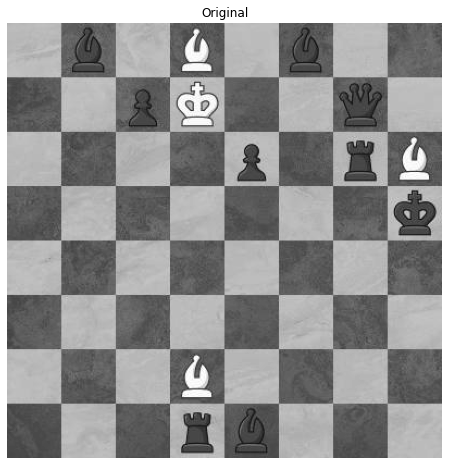

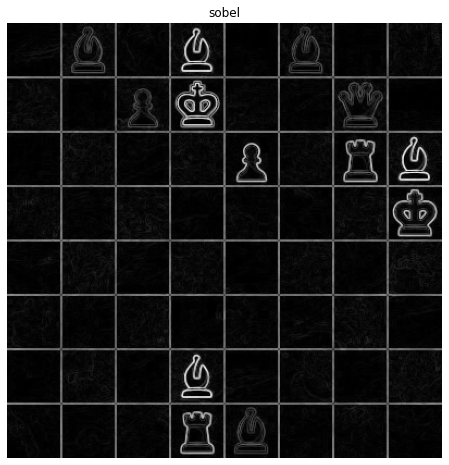

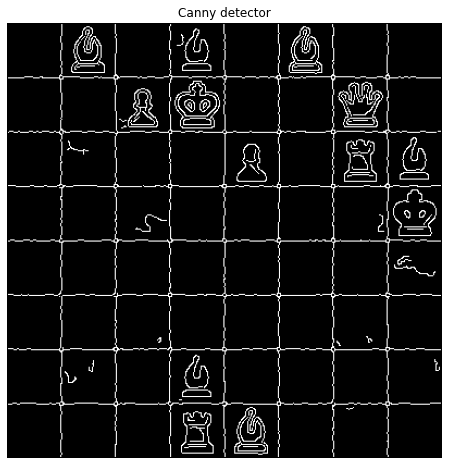

In [5]:
#testing image derivatives - sobel filers & edges

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img, cmap=plt.cm.gray)
ax.axis('off')
ax.set_title('Original')

from skimage.filters import sobel
sobel = sobel(img)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sobel, cmap=plt.cm.gray)
ax.axis('off')
ax.set_title('sobel')


#reference from https://scikit-image.org/docs/0.12.x/auto_examples/xx_applications/plot_coins_segmentation.html
#Comparing edge-based segmentation and region-based segmentation

# DWe will not usre this one 

from skimage.feature import canny
edges = canny(img)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(edges, cmap=plt.cm.gray)
ax.axis('off')
ax.set_title('Canny detector')

In [11]:
# function to split into 64 square (modified from https://www.kaggle.com/yeahlan/chess-positions-fen-generator)

def read_picture(name,location='train'):
    img = cv2.imread('../dataset/'+location+'/'+name+'.jpeg',cv2.IMREAD_GRAYSCALE)
    po2 = FENtoL(name)
    y_1 = np.array(list(po2[0]))

    size=50 #Divide the picture into 64 pieces
    index2=np.zeros((64,size**2))
    for i in range(8):
        for j in range(8):
            index2[i*8+j,:]=np.array(img)[i*size:(i+1)*size,j*size:(j+1)*size].reshape(1,size**2)

    return index2,y_1

label:first square: b
data - first square: [112. 107. 109. ... 105. 106. 128.]
image - first square:


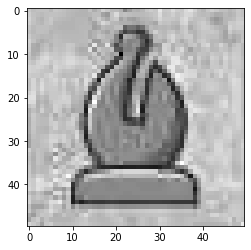

In [12]:
# Example of showing second square and second label 

name='1b1B1b2-2pK2q1-4p1rB-7k-8-8-3B4-3rb3'
index2,y_1 = read_picture(name,location='train')


print('label:first square:',y_1[1])
print('data - first square:',index2[1,:])
print('image - first square:')
plt.imshow(index2[1,:].reshape(50,50),cmap=plt.cm.gray)

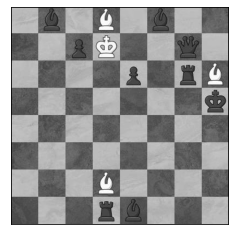

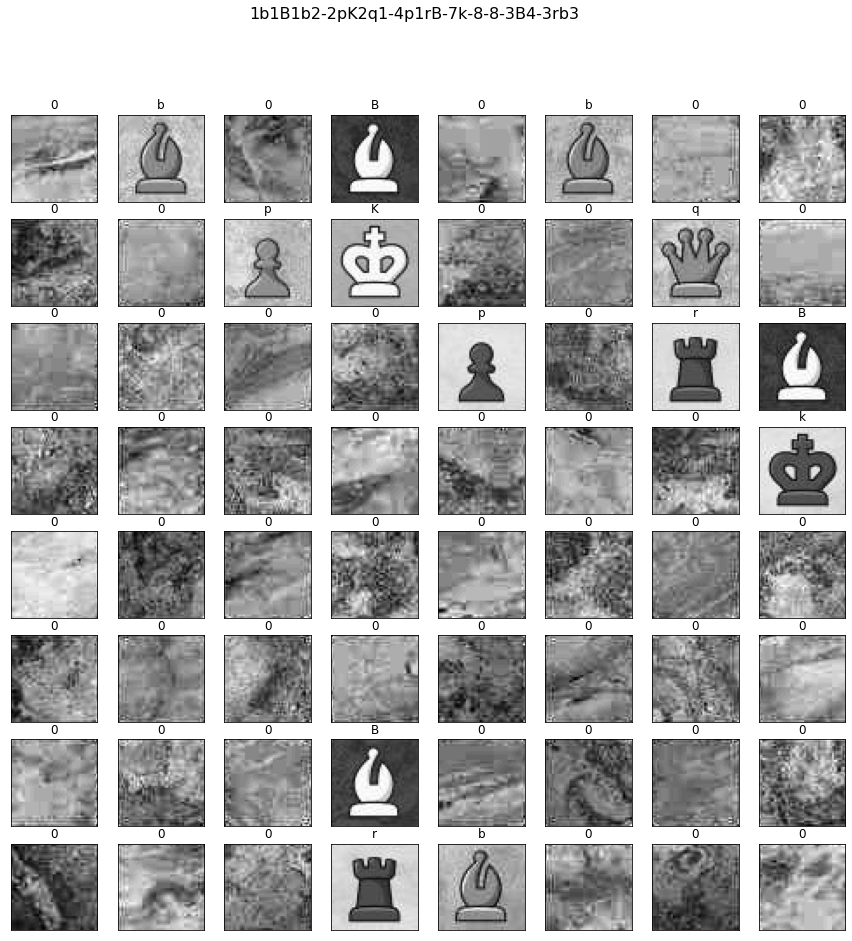

In [16]:
#Example of reading a certain picture
import matplotlib.pyplot as plt
from skimage.filters import sobel

#Example of reading a certain picture
name='1b1B1b2-2pK2q1-4p1rB-7k-8-8-3B4-3rb3'
img = cv2.imread('../dataset/train/'+name+'.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

index2,y_1=read_picture(name,location='train')

plt.figure(figsize=(15, 15))
plt.suptitle("1b1B1b2-2pK2q1-4p1rB-7k-8-8-3B4-3rb3", size=16)
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(index2[i,:].reshape(50,50),cmap=plt.cm.gray)
    plt.title(y_1.reshape(-1)[i])
    plt.xticks(())
    plt.yticks(())